In [ ]:
!pip install fastai

In [5]:
from fastai.collab import *
from fastai.tabular import *
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv('./songsDataset.csv')
df.head()

,'userID','songID','rating'
0,0,7171,5
1,0,8637,4
2,0,21966,4
3,0,35821,5
4,0,82446,5


In [7]:
df.shape

(2000000, 3)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   'userID'  int64
 1   'songID'  int64
 2   'rating'  int64
dtypes: int64(3)
memory usage: 45.8 MB


In [9]:
features=df.iloc[:,: -1]
predictions=df.iloc[:,-1]
features.head()

,'userID','songID'
0,0,7171
1,0,8637
2,0,21966
3,0,35821
4,0,82446


In [10]:
predictions.head()

0    5
1    4
2    4
3    5
4    5
Name: 'rating', dtype: int64

In [11]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,predictions,test_size=0.2,random_state=0,shuffle=True)

In [12]:
Train_data= pd.concat([X_train,y_train], axis='columns')
Train_data

,'userID','songID','rating'
608812,60881,54405,4
623729,62372,136593,5
583106,58310,64973,3
435735,43573,84361,3
1361953,136195,75168,5
...,...,...,...
152315,15231,83230,3
963395,96339,92718,5
117952,11795,37046,1
1484405,148440,75128,1


In [13]:
Train_data.describe()

,'userID','songID','rating'
count,1.600000e+06,1.600000e+06,1.600000e+06
mean,1.000253e+05,6.798402e+04,3.459217e+00
std,5.775019e+04,3.939809e+04,1.553657e+00
min,0.000000e+00,0.000000e+00,1.000000e+00
25%,5.001000e+04,3.423875e+04,2.000000e+00
50%,1.000490e+05,6.775500e+04,4.000000e+00
75%,1.500440e+05,1.019480e+05,5.000000e+00
max,1.999990e+05,1.367350e+05,5.000000e+00


In [14]:
corr_mat=Train_data.corr(method='pearson',numeric_only=True)
corr_mat

,'userID','songID','rating'
'userID',1.000000,0.001309,-0.000061
'songID',0.001309,1.000000,-0.003888
'rating',-0.000061,-0.003888,1.000000


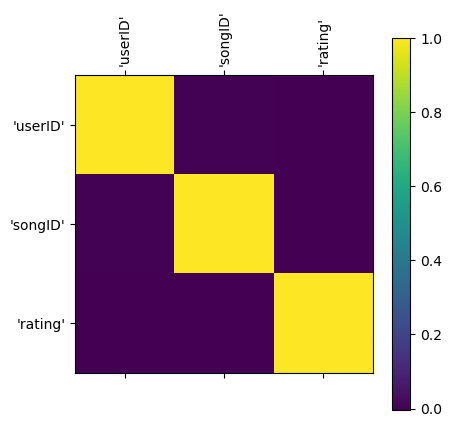

In [15]:
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)),corr_mat.columns,rotation=90)
plt.yticks(range(len(corr_mat.columns)),corr_mat.columns)
plt.colorbar()
plt.show()